In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc,roc_curve

In [2]:
df=pd.read_csv('weather_forecast_data.csv')
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [3]:
df.isnull().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [5]:
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [6]:
df.duplicated().sum()

0

In [8]:
le=LabelEncoder()
df['Rain']=le.fit_transform(df['Rain'])

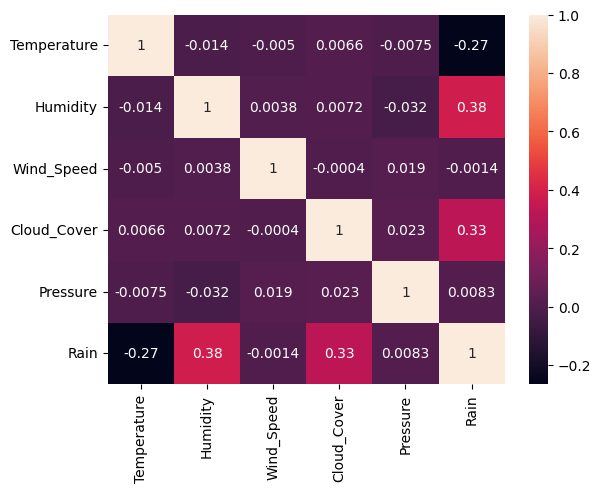

In [9]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [10]:
x=df.drop('Rain',axis=1)
y=df['Rain']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [13]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(accuracy_score(ypred,ytest))
print(classification_report(ypred,ytest))

0.914
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       438
           1       0.63      0.73      0.68        62

    accuracy                           0.91       500
   macro avg       0.80      0.83      0.81       500
weighted avg       0.92      0.91      0.92       500



C:\Users\Sweth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


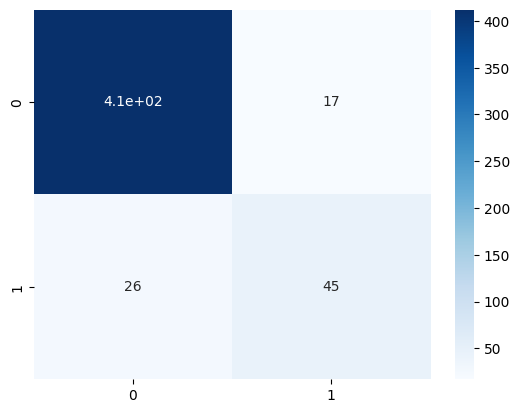

In [20]:
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,cmap='Blues',annot=True)
plt.show()

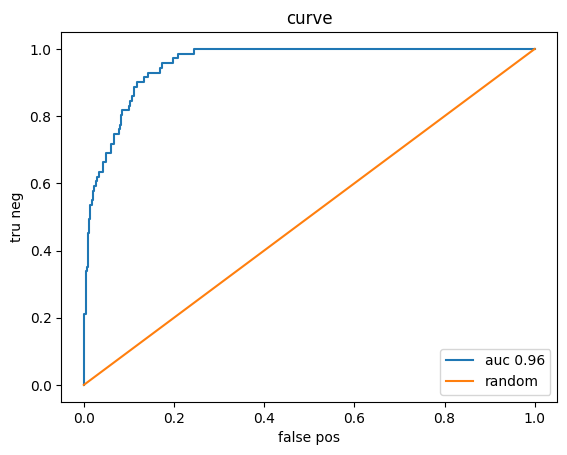

In [17]:
y_pred_proba=model.predict_proba(xtest)[:,1]
fpr,tpr,_=roc_curve(ytest,y_pred_proba)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label=f'auc {roc_auc:.2f}')
plt.plot([0,1],[0,1],label='random')
plt.xlabel('false pos')
plt.ylabel('tru neg')
plt.title('curve')
plt.legend()
plt.show()

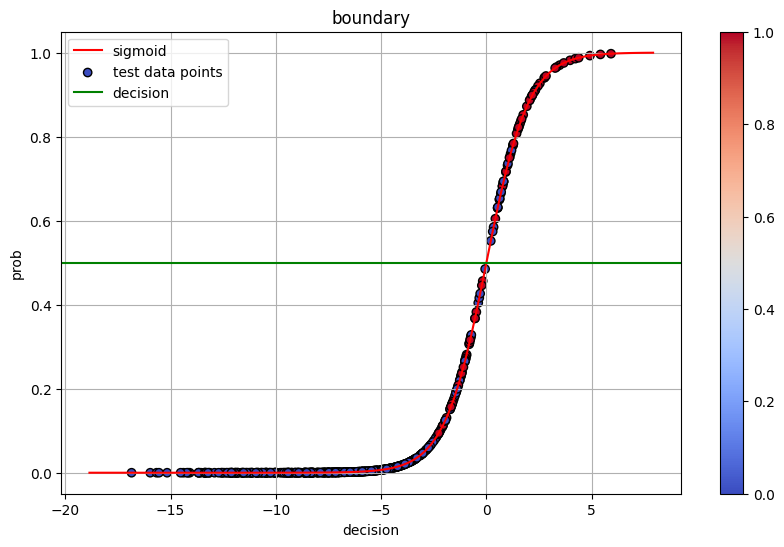

In [19]:
log_odds=model.decision_function(xtest)
probs=model.predict_proba(xtest)[:,1]
def sigmoid(x):
    return 1/(1+np.exp(-x))
log_range=np.linspace(min(log_odds)-2,max(log_odds)+2,100)
prob_range=sigmoid(log_range)
plt.figure(figsize=(10,6))
plt.plot(log_range,prob_range,color='red',label='sigmoid')
plt.scatter(log_odds,probs,c=ytest,cmap='coolwarm',edgecolors='k',label='test data points')
plt.axhline(y=0.5,color='green',label='decision')
plt.xlabel('decision')
plt.ylabel('prob')
plt.title('boundary')
plt.legend()
plt.grid(True)
plt.colorbar()
plt.show()